# Clustering HW

## Section 1: Data Acquisition and Preprocessing

### Section 1.1: Importing the libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import ward_tree
from scipy.cluster.hierarchy import dendrogram, linkage, ward

from sklearn.metrics import pairwise_distances

In [2]:
df = pd.read_csv('data/schools.csv')
df.head()

,School_Code,School_Name,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,10505.0,Abington High,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8
1,10003.0,Beaver Brook Elementary School,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6
2,10002.0,Center Elementary School,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6
3,10405.0,Frolio Middle School,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1
4,10015.0,Woodsdale Elementary School,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 17 columns):
School_Code                         1861 non-null float64
School_Name                         1861 non-null object
Pct_First_Language_Not_English      1850 non-null float64
Pct_English_Language_Learner        1850 non-null float64
Pct_Students_With_Disabilities      1850 non-null float64
Pct_High_Needs                      1850 non-null float64
Pct_Economically_Disadvantaged      1850 non-null float64
Pct_African_American                1850 non-null float64
Pct_Asian                           1850 non-null float64
Pct_Hispanic                        1850 non-null float64
Pct_White                           1850 non-null float64
Pct_Native_American                 1850 non-null float64
Pct_Native_Hawaiian_Pacific_Isla    1850 non-null float64
Pct_MultiRace_NonHispanic           1850 non-null float64
Pct_Males                           1850 non-null float64
Pct_Females             

In [5]:
df = df.drop(['School_Code','School_Name'], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861 entries, 0 to 1860
Data columns (total 15 columns):
Pct_First_Language_Not_English      1850 non-null float64
Pct_English_Language_Learner        1850 non-null float64
Pct_Students_With_Disabilities      1850 non-null float64
Pct_High_Needs                      1850 non-null float64
Pct_Economically_Disadvantaged      1850 non-null float64
Pct_African_American                1850 non-null float64
Pct_Asian                           1850 non-null float64
Pct_Hispanic                        1850 non-null float64
Pct_White                           1850 non-null float64
Pct_Native_American                 1850 non-null float64
Pct_Native_Hawaiian_Pacific_Isla    1850 non-null float64
Pct_MultiRace_NonHispanic           1850 non-null float64
Pct_Males                           1850 non-null float64
Pct_Females                         1850 non-null float64
Average_Class_Size                  1823 non-null float64
dtypes: float64(15)
mem

### Section 1.2: Data Cleaning and Replacing Missing Values

In [13]:
df['Average_Class_Size'].fillna(np.mean(df['Average_Class_Size']),inplace=True)

In [10]:
df.isnull().sum()

Pct_First_Language_Not_English      11
Pct_English_Language_Learner        11
Pct_Students_With_Disabilities      11
Pct_High_Needs                      11
Pct_Economically_Disadvantaged      11
Pct_African_American                11
Pct_Asian                           11
Pct_Hispanic                        11
Pct_White                           11
Pct_Native_American                 11
Pct_Native_Hawaiian_Pacific_Isla    11
Pct_MultiRace_NonHispanic           11
Pct_Males                           11
Pct_Females                         11
Average_Class_Size                   0
dtype: int64

In [11]:
df['Pct_First_Language_Not_English'].fillna(np.mean(df['Pct_First_Language_Not_English']),inplace=True)
df['Pct_English_Language_Learner'].fillna(np.mean(df['Pct_English_Language_Learner']),inplace=True)
df['Pct_Students_With_Disabilities'].fillna(np.mean(df['Pct_Students_With_Disabilities']),inplace=True)
df['Pct_High_Needs'].fillna(np.mean(df['Pct_High_Needs']),inplace=True)
df['Pct_Economically_Disadvantaged'].fillna(np.mean(df['Pct_Economically_Disadvantaged']),inplace=True)
df['Pct_African_American'].fillna(np.mean(df['Pct_African_American']),inplace=True)
df['Pct_Asian'].fillna(np.mean(df['Pct_Asian']),inplace=True)
df['Pct_Hispanic'].fillna(np.mean(df['Pct_Hispanic']),inplace=True)
df['Pct_White'].fillna(np.mean(df['Pct_White']),inplace=True)
df['Pct_Native_American'].fillna(np.mean(df['Pct_Native_American']),inplace=True)
df['Pct_Native_Hawaiian_Pacific_Isla'].fillna(np.mean(df['Pct_Native_Hawaiian_Pacific_Isla']),inplace=True)
df['Pct_MultiRace_NonHispanic'].fillna(np.mean(df['Pct_MultiRace_NonHispanic']),inplace=True)
df['Pct_Males'].fillna(np.mean(df['Pct_Males']),inplace=True)
df['Pct_Females'].fillna(np.mean(df['Pct_Females']),inplace=True)

In [12]:
df.isnull().sum()

Pct_First_Language_Not_English      0
Pct_English_Language_Learner        0
Pct_Students_With_Disabilities      0
Pct_High_Needs                      0
Pct_Economically_Disadvantaged      0
Pct_African_American                0
Pct_Asian                           0
Pct_Hispanic                        0
Pct_White                           0
Pct_Native_American                 0
Pct_Native_Hawaiian_Pacific_Isla    0
Pct_MultiRace_NonHispanic           0
Pct_Males                           0
Pct_Females                         0
Average_Class_Size                  0
dtype: int64

### Section 1.3: Normalizing the data

In [46]:
#https://www.statisticshowto.datasciencecentral.com/normalized/
#This is the correct formula for data normalization
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
0,0.053,0.028951,0.097,0.288,0.227754,0.025316,0.020353,0.092857,0.858,0.0250,0.032787,0.051724,0.284211,0.715789,0.352941
1,0.105,0.086852,0.133,0.371,0.246822,0.021864,0.025780,0.068367,0.884,0.0625,0.032787,0.017241,0.344737,0.655263,0.578005
2,0.128,0.036188,0.212,0.340,0.172669,0.044879,0.040706,0.085714,0.847,0.0000,0.000000,0.000000,0.397368,0.602632,0.322251
3,0.055,0.021713,0.131,0.308,0.228814,0.027618,0.024423,0.062245,0.893,0.0000,0.000000,0.017241,0.386842,0.613158,0.488491
4,0.059,0.024125,0.108,0.306,0.240466,0.023015,0.018996,0.042857,0.921,0.0000,0.000000,0.017241,0.351316,0.648684,0.726343


### Section 1.4: Preliminary Correlation Analysis and Descriptive statistics

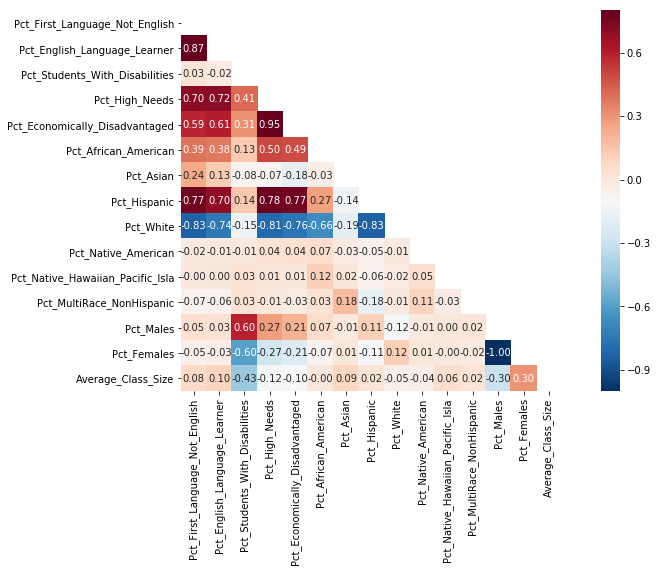

In [15]:
#Preliminary Correlation Analysis

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True, fmt=".2f", cmap='RdBu_r', mask=mask)

#### We see some interesting correlations in our data. Some notable correlations are:

   1: Pct_Economically_Disadvantaged and Pct_with_High_Needs are very strongly positively correlated with an r of .95
   
   2: Being hispanic is overall more highly correlated with lower economic opportunity and having high needs than 
      any other racial group.
     
   3: Pct_White is strongly negatively correlated with all of the negative factors, like poverty and high needs.

## Section 2: Clustering Analysis

### Section 2.1: K-Means Clustering

In [16]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=4, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [17]:
k_means.labels_

array([0, 0, 0, ..., 3, 2, 3])

In [53]:
#Find out cluster centers

k_means.cluster_centers_

array([[0.05742127, 0.02585625, 0.15439729, 0.28955996, 0.16597003,
        0.02690638, 0.07068365, 0.05087676, 0.84056204, 0.02449166,
        0.01629088, 0.17910779, 0.35686982, 0.64306158, 0.42441869],
       [0.6034142 , 0.4436014 , 0.17880473, 0.83888757, 0.68993205,
        0.13585635, 0.04700007, 0.73639053, 0.10587574, 0.01849112,
        0.00931225, 0.10174794, 0.37438493, 0.62562286, 0.43398365],
       [0.34678095, 0.23438451, 0.23333651, 0.74199365, 0.62455946,
        0.32038285, 0.09752536, 0.37874636, 0.23743492, 0.03123016,
        0.02154567, 0.21444992, 0.38674185, 0.61325815, 0.41621759],
       [0.1887639 , 0.09749836, 0.20898709, 0.5127746 , 0.37017434,
        0.08760534, 0.1108678 , 0.16314967, 0.62466965, 0.0427237 ,
        0.01414935, 0.30659992, 0.37281206, 0.62702236, 0.39550973]])

In [19]:
#Making a dataframe out of the clusters
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [21]:
#Adding the cluster column onto our original data
df2 = df_norm.join(df1)
df2.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size,cluster
0,0.053,0.028951,0.097,0.288,0.227754,0.025316,0.020353,0.092857,0.858,0.0250,0.032787,0.051724,0.284211,0.715789,0.352941,0
1,0.105,0.086852,0.133,0.371,0.246822,0.021864,0.025780,0.068367,0.884,0.0625,0.032787,0.017241,0.344737,0.655263,0.578005,0
2,0.128,0.036188,0.212,0.340,0.172669,0.044879,0.040706,0.085714,0.847,0.0000,0.000000,0.000000,0.397368,0.602632,0.322251,0
3,0.055,0.021713,0.131,0.308,0.228814,0.027618,0.024423,0.062245,0.893,0.0000,0.000000,0.017241,0.386842,0.613158,0.488491,0
4,0.059,0.024125,0.108,0.306,0.240466,0.023015,0.018996,0.042857,0.921,0.0000,0.000000,0.017241,0.351316,0.648684,0.726343,0


In [23]:
df2.groupby(['cluster']).mean() 

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,0.057421,0.025856,0.154397,0.289560,0.165970,0.026906,0.070684,0.050877,0.840562,0.024492,0.016291,0.179108,0.356870,0.643062,0.424419
1,0.603414,0.443601,0.178805,0.838888,0.689932,0.135856,0.047000,0.736391,0.105876,0.018491,0.009312,0.101748,0.374385,0.625623,0.433984
2,0.346781,0.234385,0.233337,0.741994,0.624559,0.320383,0.097525,0.378746,0.237435,0.031230,0.021546,0.214450,0.386742,0.613258,0.416218
3,0.188764,0.097498,0.208987,0.512775,0.370174,0.087605,0.110868,0.163150,0.624670,0.042724,0.014149,0.306600,0.372812,0.627022,0.395510


### Section 2.1.1: Visualization

C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


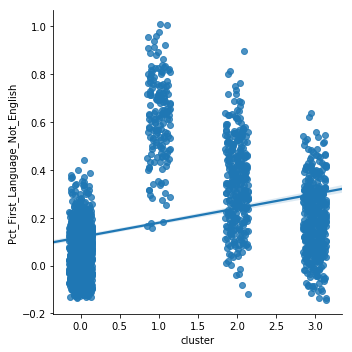

In [25]:
sns.lmplot("cluster", "Pct_First_Language_Not_English", df2, x_jitter=.15, y_jitter=.15)

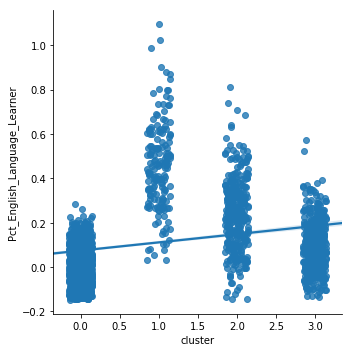

In [27]:
sns.lmplot("cluster", "Pct_English_Language_Learner", df2, x_jitter=.15, y_jitter=.15)

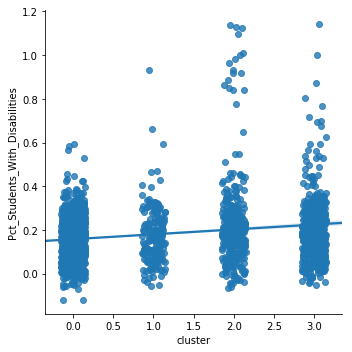

In [28]:
sns.lmplot("cluster", "Pct_Students_With_Disabilities", df2, x_jitter=.15, y_jitter=.15)

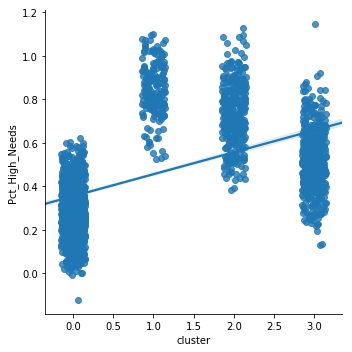

In [29]:
sns.lmplot("cluster", "Pct_High_Needs", df2, x_jitter=.15, y_jitter=.15)

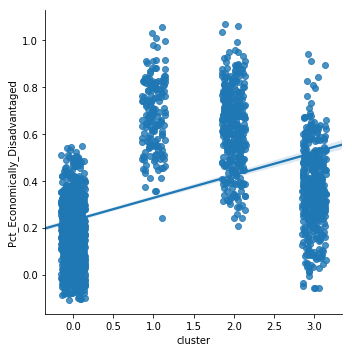

In [30]:
sns.lmplot("cluster", "Pct_Economically_Disadvantaged", df2, x_jitter=.15, y_jitter=.15)

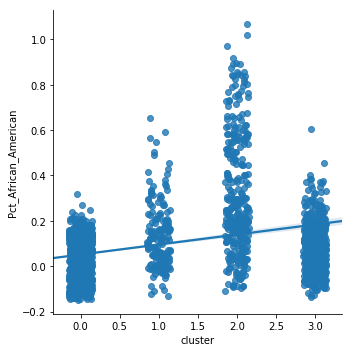

In [32]:
sns.lmplot("cluster", "Pct_African_American", df2, x_jitter=.15, y_jitter=.15)

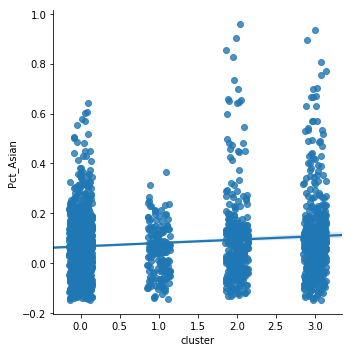

In [33]:
sns.lmplot("cluster", "Pct_Asian", df2, x_jitter=.15, y_jitter=.15)

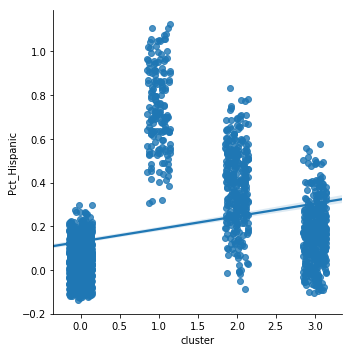

In [34]:
sns.lmplot("cluster", "Pct_Hispanic", df2, x_jitter=.15, y_jitter=.15)

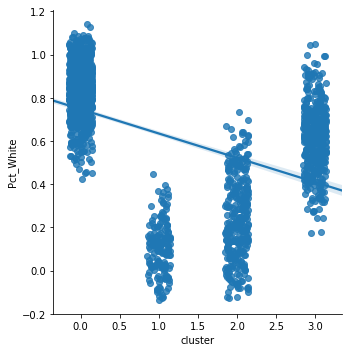

In [35]:
sns.lmplot("cluster", "Pct_White", df2, x_jitter=.15, y_jitter=.15)

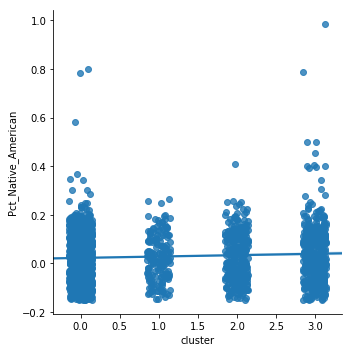

In [36]:
sns.lmplot("cluster", "Pct_Native_American", df2, x_jitter=.15, y_jitter=.15)

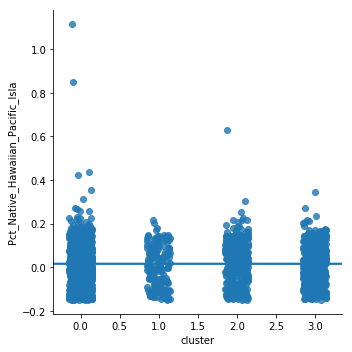

In [37]:
sns.lmplot("cluster", "Pct_Native_Hawaiian_Pacific_Isla", df2, x_jitter=.15, y_jitter=.15)

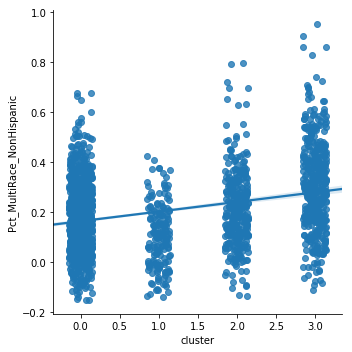

In [38]:
sns.lmplot("cluster", "Pct_MultiRace_NonHispanic", df2, x_jitter=.15, y_jitter=.15)

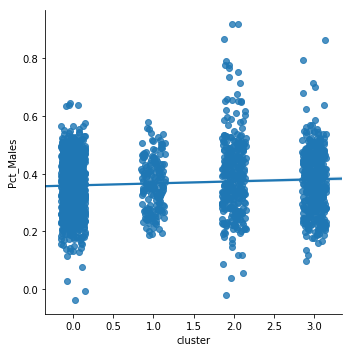

In [39]:
sns.lmplot("cluster", "Pct_Males", df2, x_jitter=.15, y_jitter=.15)

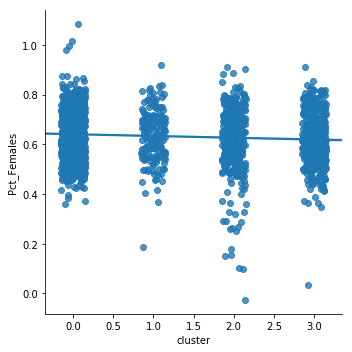

In [40]:
sns.lmplot("cluster", "Pct_Females", df2, x_jitter=.15, y_jitter=.15)

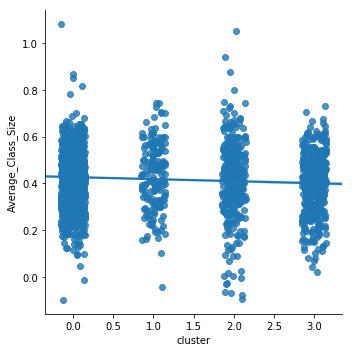

In [41]:
sns.lmplot("cluster","Average_Class_Size", df2, x_jitter=.15, y_jitter=.15)

#### Based on our analysis, we can see that the following factors $are$ important in determining a cluster:

- Non-native english speakers
- Pct that are currently learning english
- Pct with high needs
- Pct of students that are economically disadvantaged
- Pct of students that are hispanic
- Pct of students that are white


### Section 2.2: Building A Random Forest to Determine Important Factors

In [42]:
# set X and y

y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)

In [43]:
# build the random forest model

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

C:\Users\Eric\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


0.99892530897367

In [45]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
3,Pct_High_Needs,0.192326
8,Pct_White,0.157622
7,Pct_Hispanic,0.146357
0,Pct_First_Language_Not_English,0.140475
4,Pct_Economically_Disadvantaged,0.129936
5,Pct_African_American,0.078640
1,Pct_English_Language_Learner,0.053309
11,Pct_MultiRace_NonHispanic,0.034255
2,Pct_Students_With_Disabilities,0.016050
6,Pct_Asian,0.013929


#### Using Our Random Forest to Validate our previous results, we see that we were mostly correct, but the top 5 most deterministic features of a cluster are:

        1: Pct_High_Needs
        2: Pct_White
        3: Pct_Hispanic
        4: Pct_First_Language_Not_English
        5: Pct_Economically_Disadvantaged

## Section 3: K-Means with optimal k value using The Elbow Method and The Sihouette Method 

Text(0.5,1,'Selecting k with the Elbow Method')

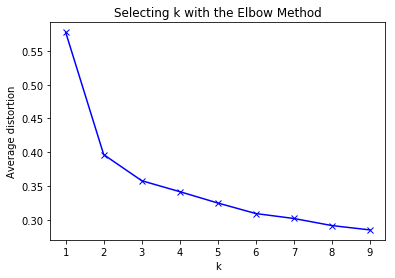

In [48]:
from scipy.spatial.distance import cdist 

K = range(1, 10) 

meandistortions = []

for k in K: 
    kmeans = KMeans(n_clusters=k, random_state=1) 
    kmeans.fit(df_norm) 
    meandistortions.append(sum(np.min(cdist(df_norm, kmeans.cluster_centers_, 'euclidean'), axis=1)) / df_norm.shape[0]) 

plt.plot(K, meandistortions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average distortion') 
plt.title('Selecting k with the Elbow Method') 

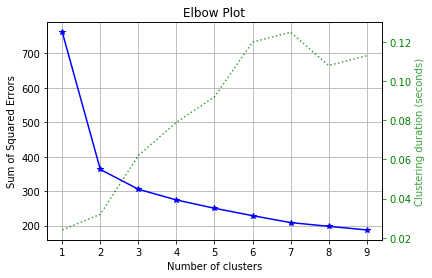

In [49]:
import scikitplot as skplt

kmeans = KMeans(random_state=1) 
skplt.cluster.plot_elbow_curve(kmeans, df_norm, cluster_ranges=range(1, 10))

#### It looks like 2 or 3 clusters are best based on the elbow method. Lets try the silhouette score to see which one is better.

In [57]:
#Using silhouette score to determine optimal number of clusters

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics

tests = [2, 3, 4]

for k in tests:
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(df_norm)
    labels = kmeans_model.labels_
    print metrics.silhouette_score(df_norm, labels, metric='euclidean')

0.5120614394917492
0.34015994173469793
0.3030885619296084


#### Based on both the Elbow Method and Silhouette Score Method, 2 clusters appears to be optimal, so I will re-run the K-Means algorithm with 2 clusters and see how our results differ.

### Section 3.1: Optimal 2-Means clustering

In [58]:
# clustering analysis using k-means
k_means = KMeans(init='k-means++', n_clusters=2, random_state=0)
k_means.fit(df_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [59]:
k_means.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [60]:
#Find out cluster centers

k_means.cluster_centers_

array([[0.0904912 , 0.04398565, 0.16936943, 0.34740044, 0.21824174,
        0.04329684, 0.08060049, 0.07754075, 0.78617087, 0.03005159,
        0.01560068, 0.21534251, 0.36125945, 0.63864979, 0.41638133],
       [0.42215947, 0.29256524, 0.21429644, 0.76206379, 0.63303535,
        0.24165924, 0.08584317, 0.48361795, 0.21737523, 0.02701689,
        0.01722388, 0.18516961, 0.38164313, 0.61833218, 0.41995866]])

In [61]:
#Making a dataframe out of the clusters
df1 = pd.DataFrame(k_means.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [62]:
#Adding the cluster column onto our original data
df2 = df_norm.join(df1)
df2.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size,cluster
0,0.053,0.028951,0.097,0.288,0.227754,0.025316,0.020353,0.092857,0.858,0.0250,0.032787,0.051724,0.284211,0.715789,0.352941,0
1,0.105,0.086852,0.133,0.371,0.246822,0.021864,0.025780,0.068367,0.884,0.0625,0.032787,0.017241,0.344737,0.655263,0.578005,0
2,0.128,0.036188,0.212,0.340,0.172669,0.044879,0.040706,0.085714,0.847,0.0000,0.000000,0.000000,0.397368,0.602632,0.322251,0
3,0.055,0.021713,0.131,0.308,0.228814,0.027618,0.024423,0.062245,0.893,0.0000,0.000000,0.017241,0.386842,0.613158,0.488491,0
4,0.059,0.024125,0.108,0.306,0.240466,0.023015,0.018996,0.042857,0.921,0.0000,0.000000,0.017241,0.351316,0.648684,0.726343,0


In [63]:
df2.groupby(['cluster']).mean() 

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,0.090491,0.043986,0.169369,0.347400,0.218242,0.043297,0.080600,0.077541,0.786171,0.030052,0.015601,0.215343,0.361259,0.638650,0.416381
1,0.422159,0.292565,0.214296,0.762064,0.633035,0.241659,0.085843,0.483618,0.217375,0.027017,0.017224,0.185170,0.381643,0.618332,0.419959


### Section 3.2 Visualization for our 2-Means Clusters

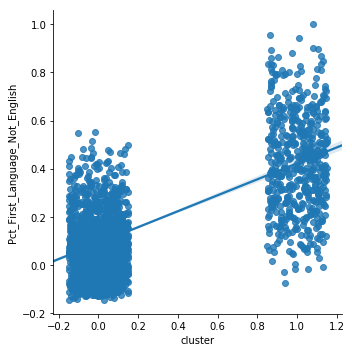

In [64]:
sns.lmplot("cluster", "Pct_First_Language_Not_English", df2, x_jitter=.15, y_jitter=.15)

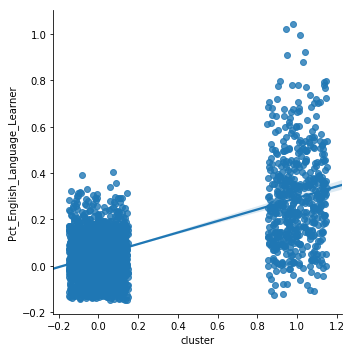

In [65]:
sns.lmplot("cluster", "Pct_English_Language_Learner", df2, x_jitter=.15, y_jitter=.15)

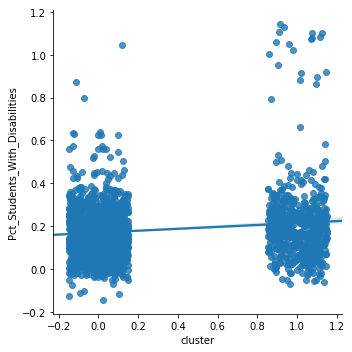

In [66]:
sns.lmplot("cluster", "Pct_Students_With_Disabilities", df2, x_jitter=.15, y_jitter=.15)

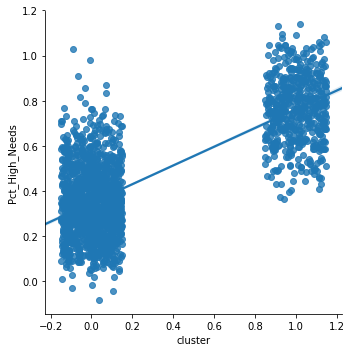

In [67]:
sns.lmplot("cluster", "Pct_High_Needs", df2, x_jitter=.15, y_jitter=.15)

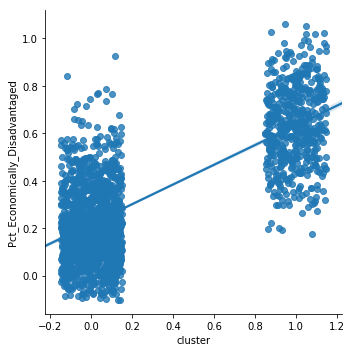

In [68]:
sns.lmplot("cluster", "Pct_Economically_Disadvantaged", df2, x_jitter=.15, y_jitter=.15)

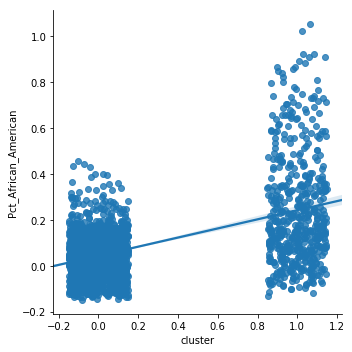

In [69]:
sns.lmplot("cluster", "Pct_African_American", df2, x_jitter=.15, y_jitter=.15)

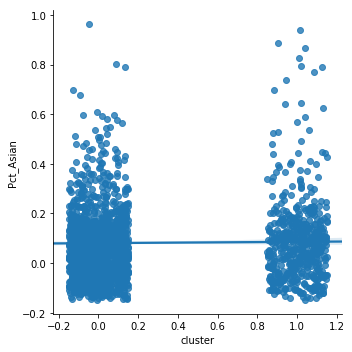

In [70]:
sns.lmplot("cluster", "Pct_Asian", df2, x_jitter=.15, y_jitter=.15)

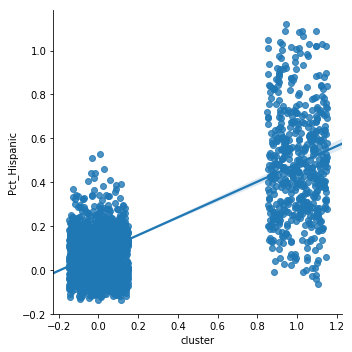

In [71]:
sns.lmplot("cluster", "Pct_Hispanic", df2, x_jitter=.15, y_jitter=.15)

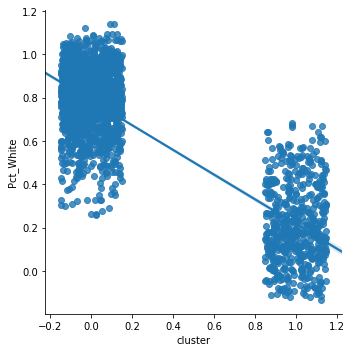

In [72]:
sns.lmplot("cluster", "Pct_White", df2, x_jitter=.15, y_jitter=.15)

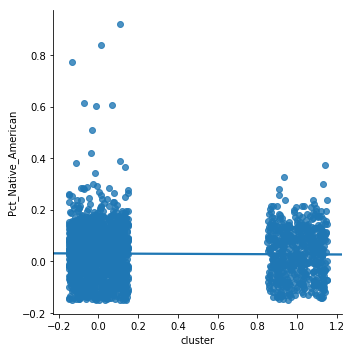

In [73]:
sns.lmplot("cluster", "Pct_Native_American", df2, x_jitter=.15, y_jitter=.15)

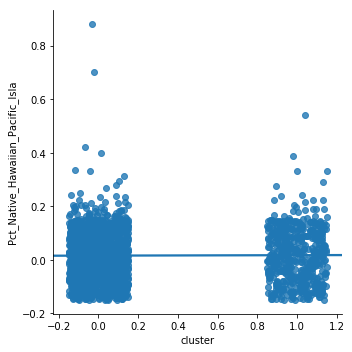

In [74]:
sns.lmplot("cluster", "Pct_Native_Hawaiian_Pacific_Isla", df2, x_jitter=.15, y_jitter=.15)

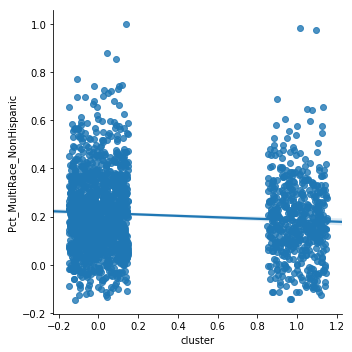

In [75]:
sns.lmplot("cluster", "Pct_MultiRace_NonHispanic", df2, x_jitter=.15, y_jitter=.15)

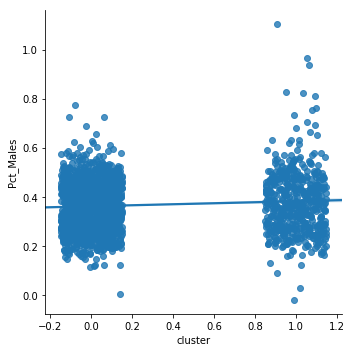

In [76]:
sns.lmplot("cluster", "Pct_Males", df2, x_jitter=.15, y_jitter=.15)

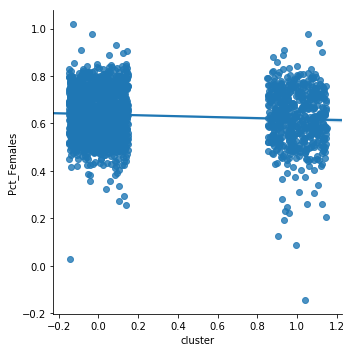

In [77]:
sns.lmplot("cluster", "Pct_Females", df2, x_jitter=.15, y_jitter=.15)

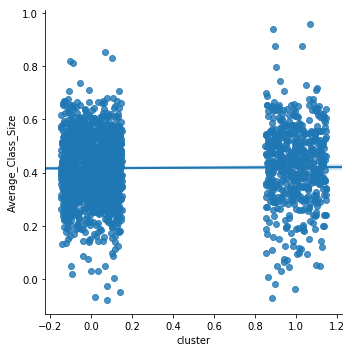

In [78]:
sns.lmplot("cluster","Average_Class_Size", df2, x_jitter=.15, y_jitter=.15)

### Section 3.3: Building A Random Forest to Determine the most Important Factors in our 2-Means Clustering

In [79]:
# set X and y

y = df2['cluster'].values
X = df2.drop(['cluster'], axis=1)

In [80]:
# build the random forest model

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=20)    #building 20 decision trees
clf=clf.fit(X, y)
clf.score(X,y)

1.0

In [81]:
pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
8,Pct_White,0.244440
3,Pct_High_Needs,0.208728
7,Pct_Hispanic,0.139233
0,Pct_First_Language_Not_English,0.124658
4,Pct_Economically_Disadvantaged,0.102258
1,Pct_English_Language_Learner,0.086727
5,Pct_African_American,0.051395
2,Pct_Students_With_Disabilities,0.009720
11,Pct_MultiRace_NonHispanic,0.008270
13,Pct_Females,0.007262


#### Based on our random forest model of our 2-Means cluster, we see that the 5 most important factors in determining which cluster an observation belongs to are:

        1: Pct_White
        2: Pct_High_Needs
        3: Pct_Hispanic
        4: Pct_First_Language_Not_English
        5: Pct_Economically_Disadvantaged

## Section 4: Agglomerative Clustering

Recursively merges the pair of clusters that minimally increases a given linkage distance

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering

In [82]:
np.random.seed(1) # setting random seed to get the same results each time.

agg= AgglomerativeClustering(n_clusters=2, linkage='ward').fit(X)
agg.labels_

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

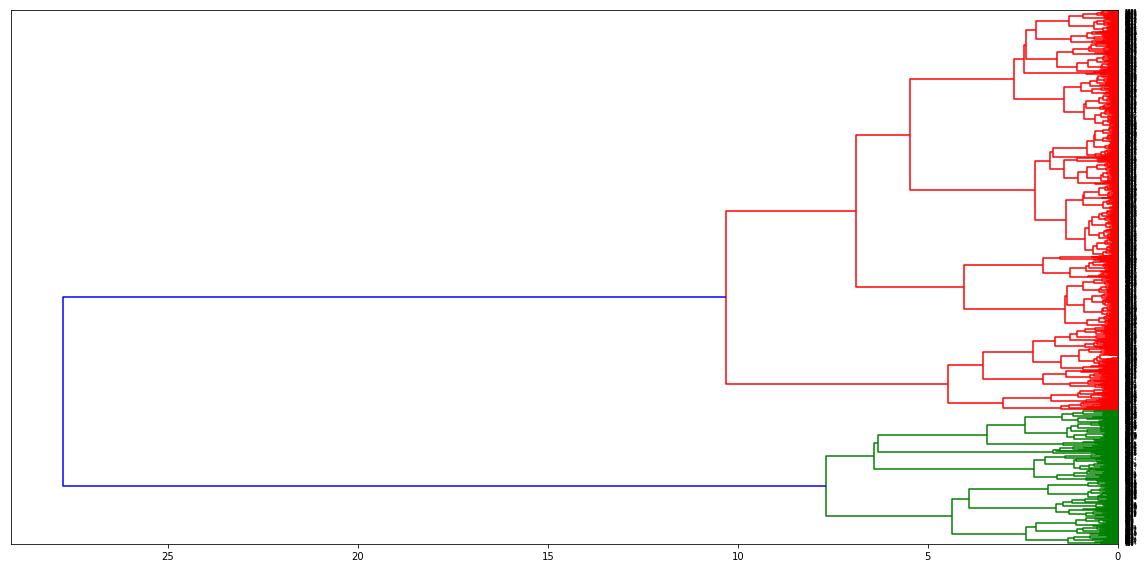

In [83]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="left")
plt.tight_layout() # fixes margins

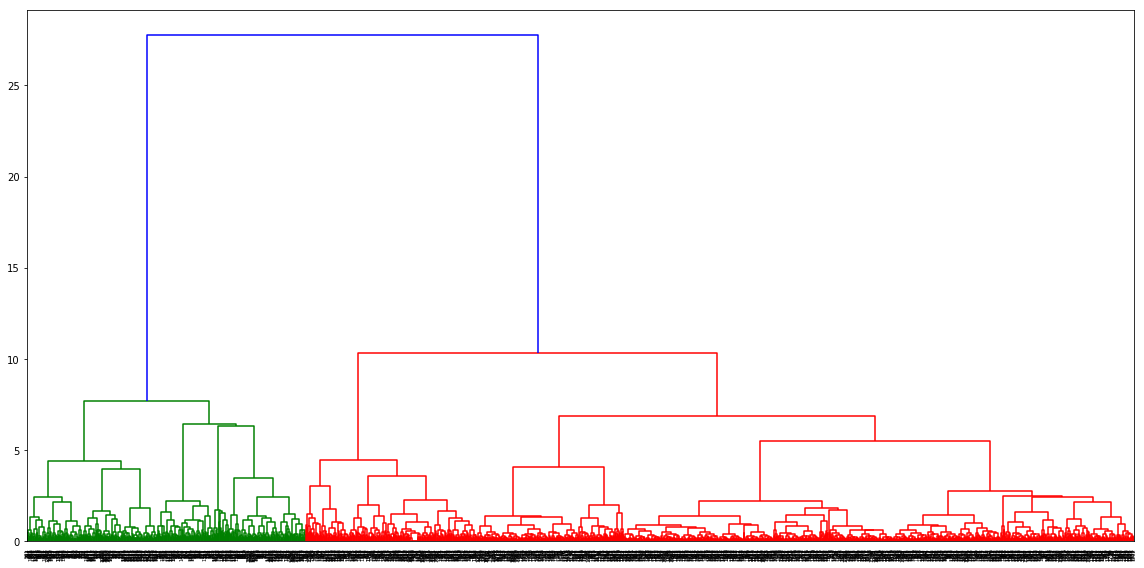

In [84]:
plt.figure(figsize=(16,8))

linkage_matrix = ward(X)
dendrogram(linkage_matrix, orientation="top")
plt.tight_layout() # fixes margins

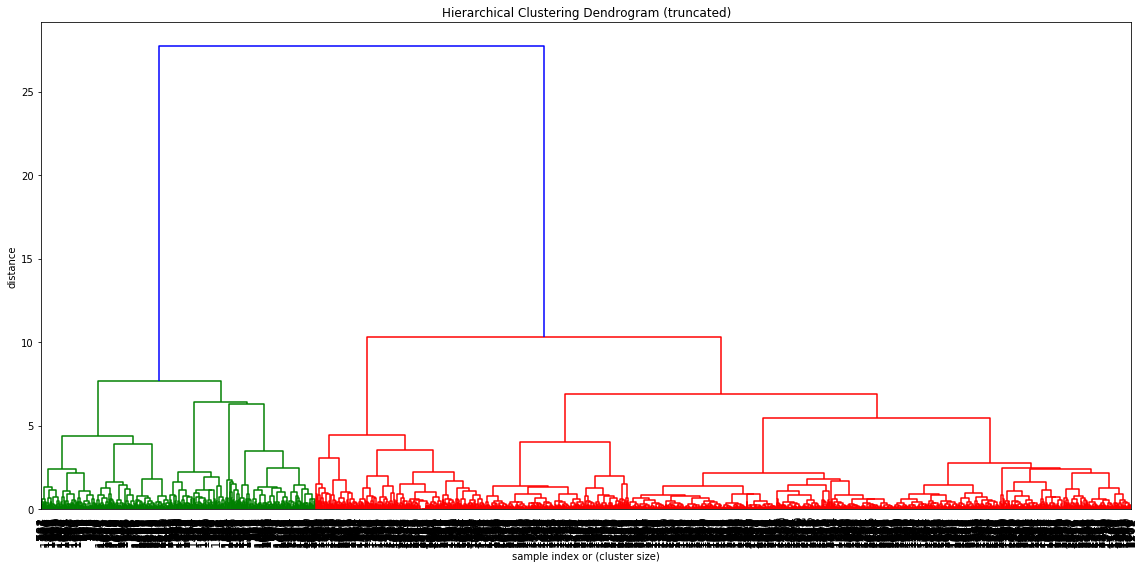

In [85]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           #truncate_mode='lastp',  # show only the last p merged clusters
           #p=12,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

Let's ask for 4 clusters only (p = 4)

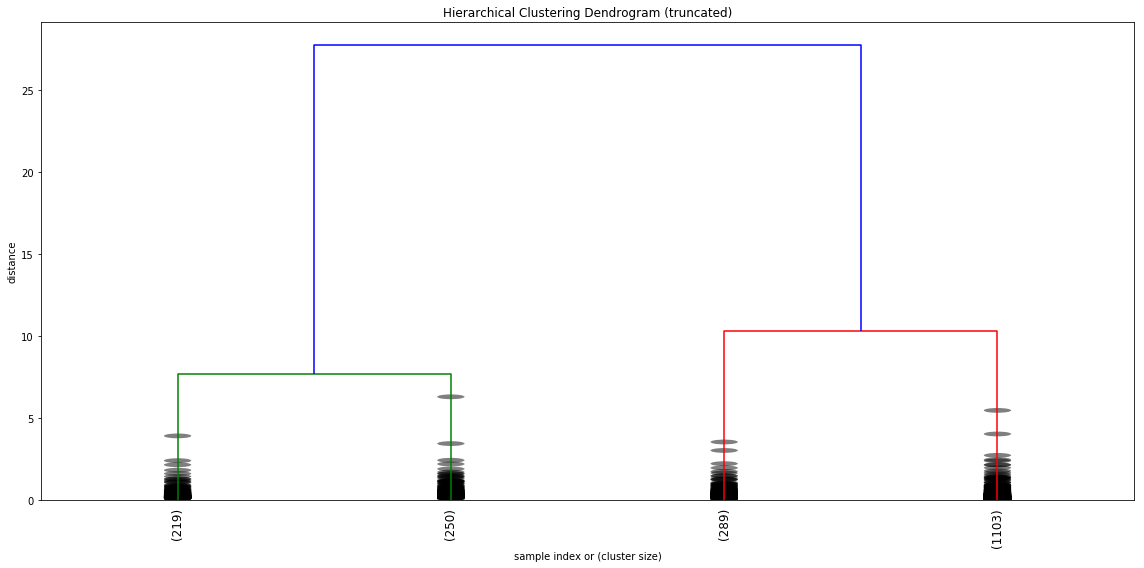

In [86]:
plt.figure(figsize=(16,8))

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')

linkage_matrix = ward(X)
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # show only the last p merged clusters
           p=4,  # show only the last p merged clusters
           #show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=12.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           orientation="top")
plt.tight_layout() # fixes margins

In [89]:
#To add cluster label into the dataset as a column
df1 = pd.DataFrame(agg.labels_, columns = ['cluster'])
df1.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [88]:
df2 = df.join(df1)
df2.head()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size,cluster
0,5.3,2.4,9.7,28.8,21.5,2.2,1.5,9.1,85.8,0.2,0.2,0.9,45.6,54.4,15.8,0
1,10.5,7.2,13.3,37.1,23.3,1.9,1.9,6.7,88.4,0.5,0.2,0.3,50.2,49.8,24.6,0
2,12.8,3.0,21.2,34.0,16.3,3.9,3.0,8.4,84.7,0.0,0.0,0.0,54.2,45.8,14.6,0
3,5.5,1.8,13.1,30.8,21.6,2.4,1.8,6.1,89.3,0.0,0.0,0.3,53.4,46.6,21.1,0
4,5.9,2.0,10.8,30.6,22.7,2.0,1.4,4.2,92.1,0.0,0.0,0.3,50.7,49.3,30.4,0


In [90]:
df2.groupby('cluster').mean()

,Pct_First_Language_Not_English,Pct_English_Language_Learner,Pct_Students_With_Disabilities,Pct_High_Needs,Pct_Economically_Disadvantaged,Pct_African_American,Pct_Asian,Pct_Hispanic,Pct_White,Pct_Native_American,Pct_Native_Hawaiian_Pacific_Isla,Pct_MultiRace_NonHispanic,Pct_Males,Pct_Females,Average_Class_Size
cluster,,,,,,,,,,,,,,,
0,9.700238,3.926029,17.183951,36.201637,22.107100,4.128444,5.921739,8.711611,77.078442,0.242218,0.096823,3.822459,51.481533,48.511097,18.269223
1,44.809382,26.235821,21.309595,77.526866,60.634755,22.266311,6.434328,49.522814,18.542431,0.207463,0.101493,2.926226,53.139659,46.860554,18.472971


In [91]:
df2.groupby('cluster').size()

cluster
0    1392
1     469
dtype: int64

## Section 5: Storytelling

- We determined that the optimal number of clusters to best separate data in this dataset was 2 clusters by using the elbow method as well as the silhouette score method, and we determined the most relevant factors that determined if a school fell into cluster 0 or cluster 1 by building a random forest classifier.
- Those two clusters could probabaly be categorized as follows: 
          
              -cluster 0 being schools with mostly white students, students that do not have special needs,
               students whose native language is English, and students that do not come from poor families.
               
              -cluster 1 being schools with largely non-white populations, non-native english speakers,
               a high proportion of the students with special needs, and students that are overall economically
               disadvantaged.
               
- Further information would be needed to do other kinds of analysis, such as predicting school quality or success or graduation   rates. Based on the outcome of that analysis, public policy recommendations could be made to government officials to try to 
  ameliorate some of the sever challenges faced by the schools in cluster 1.

##### On my honor as a student, I have neither given nor recieved any unauthorized aid on this academic work

Eric VanMeerhaeghe